In [21]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df = pd.read_csv("../data/preprocessed_cleaned_body.csv")

In [3]:
df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1.67,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,0.67,federal appeal court rejected direct constitut...
2,As part of the Trump administration's effort t...,-2.75,part trump administration effort slow migrant ...
3,"President Donald Trump and ""the Trump of the T...",-4.33,president donald trump trump tropic brazilian ...
4,"U.S Senator Elizabeth Warren, who is competing...",-10.00,u senator elizabeth warren competing democrati...


In [4]:
bins = [-41, -5, 5, 41]
names = ['1', '2', '3']

multi_df = df.loc[:]
multi_df['Category'] = pd.cut(multi_df['Bias'], bins, labels=names)

In [5]:
multi_df.head()

,Body,Bias,cleaned_body,Category
0,Abortion rights advocates have asked the U.S. ...,1.67,abortion right advocate asked u supreme court ...,2
1,A federal appeals court rejected the most dire...,0.67,federal appeal court rejected direct constitut...,2
2,As part of the Trump administration's effort t...,-2.75,part trump administration effort slow migrant ...,2
3,"President Donald Trump and ""the Trump of the T...",-4.33,president donald trump trump tropic brazilian ...,2
4,"U.S Senator Elizabeth Warren, who is competing...",-10.00,u senator elizabeth warren competing democrati...,1


In [6]:
tfidf_transformer = TfidfVectorizer(max_features = 800)
tfidf = tfidf_transformer.fit_transform(multi_df['cleaned_body'])

X = pd.DataFrame(tfidf.toarray(), columns=tfidf_transformer.get_feature_names())
y = multi_df['Category']

In [7]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [8]:
X.head()

,ability,able,abortion,abuse,access,according,account,accused,across,act,...,would,wrong,wrote,year,yearold,yet,york,you,young,zealand
0,0.0,0.000000,0.826048,0.0,0.247934,0.000000,0.0,0.000000,0.075994,0.0,...,0.060013,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.172820,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.106760,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.209583,0.116497,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.126204,0.000000,0.0,0.095021,0.000000,0.0,0.115364,0.000000,0.0,...,0.184000,0.0,0.000000,0.000000,0.0,0.110801,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.058162,0.0,0.000000,0.000000,0.0,...,0.394942,0.0,0.000000,0.126932,0.0,0.095130,0.071771,0.0,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

## Logical Regression with 3 Classes

In [10]:
# from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
predictions = logisticRegr.predict(X_test)

In [13]:
# Use score method to get accuracy of model

score = logisticRegr.score(X_test, y_test)
print(score*100,"%")

60.381861575178995 %


In [14]:
y_probs = logisticRegr.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, average="macro", multi_class="ovo")
print('ROC Score is: ', roc_auc)

ROC Score is:  0.7748667274504489


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[106  40  16]
 [ 43 112  12]
 [ 32  23  35]]


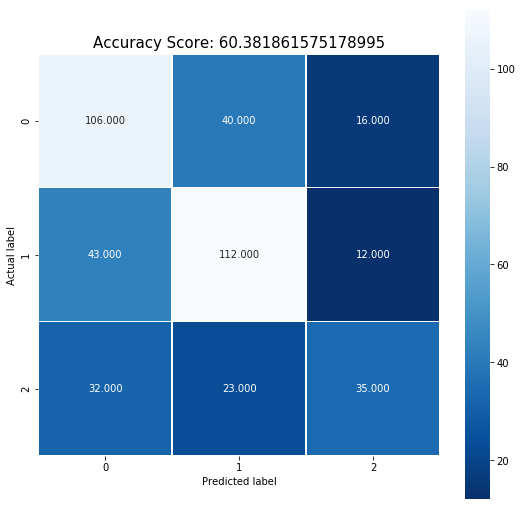

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score*100)
plt.title(all_sample_title, size = 15);